# Deep Learning Tutorial 05: RNN - Time Series Prediction with LSTM Recurrent Neural Networks (Ch25)

from Deep Learning with Python by Jason Brownlee (2016)
[e-book](https://machinelearningmastery.com/deep-learning-with-python/)
[요약](http://machinelearningmastery.com/introduction-python-deep-learning-library-keras/)

# Chapter 25 Time Series Prediction with LSTM Recurrent Neural Networks

## 25.1 LSTM Network For Regression

- Dataset은 Ch24 참조

In [1]:
%matplotlib inline

# LSTM for international airline passengers problem with regression framing
import numpy as np
import matplotlib.pyplot as plt
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

# fix random seed for reproducibility
np.random.seed(7)

/home/kikim/anaconda2/envs/theano/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
Using Theano backend.
Using gpu device 0: GeForce GTX TITAN X (CNMeM is enabled with initial size: 95.0% of memory, cuDNN 5005)


In [2]:
# load the dataset
dataframe = pandas.read_csv('~/Downloads/international-airline-passengers.csv', 
                            usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

### <img src='http://findicons.com/files/icons/1008/quiet/128/attention2.png' style='height: 16pt; display: inline-block;' /> 주의!

LSTM은 (특히 activation function이 sigmoid나 tanh인 경우) input의 scale에 민감하다. input data를 normalize해주자.

In [3]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

print(np.min(dataset), np.max(dataset), np.mean(dataset), np.median(dataset))

(0.0, 1.0, 0.34034479, 0.31177604)


In [4]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [5]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print('trainX.shape=',trainX.shape)

print('X', 'Y')
for (x,y) in zip(trainX[:10], trainY[:10]):
    print(x, y)

('trainX.shape=', (94, 1))
('X', 'Y')
(array([ 0.01544401], dtype=float32), 0.027027026)
(array([ 0.02702703], dtype=float32), 0.054054052)
(array([ 0.05405405], dtype=float32), 0.048262551)
(array([ 0.04826255], dtype=float32), 0.032818526)
(array([ 0.03281853], dtype=float32), 0.059845567)
(array([ 0.05984557], dtype=float32), 0.084942073)
(array([ 0.08494207], dtype=float32), 0.084942073)
(array([ 0.08494207], dtype=float32), 0.061776072)
(array([ 0.06177607], dtype=float32), 0.028957531)
(array([ 0.02895753], dtype=float32), 0.0)


In [6]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

print('trainX.shape=',trainX.shape)


print('X', 'Y')
for (x,y) in zip(trainX[:10], trainY[:10]):
    print(x, y)

('trainX.shape=', (94, 1, 1))
('X', 'Y')
(array([[ 0.01544401]], dtype=float32), 0.027027026)
(array([[ 0.02702703]], dtype=float32), 0.054054052)
(array([[ 0.05405405]], dtype=float32), 0.048262551)
(array([[ 0.04826255]], dtype=float32), 0.032818526)
(array([[ 0.03281853]], dtype=float32), 0.059845567)
(array([[ 0.05984557]], dtype=float32), 0.084942073)
(array([[ 0.08494207]], dtype=float32), 0.084942073)
(array([[ 0.08494207]], dtype=float32), 0.061776072)
(array([[ 0.06177607]], dtype=float32), 0.028957531)
(array([[ 0.02895753]], dtype=float32), 0.0)


In [7]:
def buildModel(input_dim=1):
    model = Sequential()
    model.add(LSTM(4, input_dim=input_dim))
    model.add(Dense(1))
    
    return model

# create and fit the LSTM network
model = buildModel(look_back)
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)

Epoch 1/100
0s - loss: 0.0461
Epoch 2/100
0s - loss: 0.0227
Epoch 3/100
0s - loss: 0.0160
Epoch 4/100
0s - loss: 0.0143
Epoch 5/100
0s - loss: 0.0134
Epoch 6/100
0s - loss: 0.0126
Epoch 7/100
0s - loss: 0.0116
Epoch 8/100
0s - loss: 0.0106
Epoch 9/100
0s - loss: 0.0095
Epoch 10/100
0s - loss: 0.0083
Epoch 11/100
0s - loss: 0.0071
Epoch 12/100
0s - loss: 0.0059
Epoch 13/100
0s - loss: 0.0048
Epoch 14/100
0s - loss: 0.0039
Epoch 15/100
0s - loss: 0.0031
Epoch 16/100
0s - loss: 0.0026
Epoch 17/100
0s - loss: 0.0024
Epoch 18/100
0s - loss: 0.0022
Epoch 19/100
0s - loss: 0.0022
Epoch 20/100
0s - loss: 0.0021
Epoch 21/100
0s - loss: 0.0021
Epoch 22/100
0s - loss: 0.0021
Epoch 23/100
0s - loss: 0.0021
Epoch 24/100
0s - loss: 0.0021
Epoch 25/100
0s - loss: 0.0021
Epoch 26/100
0s - loss: 0.0021
Epoch 27/100
0s - loss: 0.0020
Epoch 28/100
0s - loss: 0.0020
Epoch 29/100
0s - loss: 0.0021
Epoch 30/100
0s - loss: 0.0021
Epoch 31/100
0s - loss: 0.0020
Epoch 32/100
0s - loss: 0.0020
Epoch 33/100
0s -

In [10]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score:', scaler.inverse_transform(np.array([[trainScore]])))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score:', scaler.inverse_transform(np.array([[testScore]])))

('Train Score:', array([[ 105.03351111]]))
('Test Score:', array([[ 108.83114308]]))


In [11]:
def plotPrediction(look_back, model, trainX, testX, dataset, batch_size=32):
    # generate predictions for training
    trainPredict = model.predict(trainX, batch_size=batch_size)
    testPredict = model.predict(testX, batch_size=batch_size)
    # shift train predictions for plotting
    trainPredictPlot = np.empty_like(dataset)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = np.empty_like(dataset)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
    # plot baseline and predictions
    plt.plot(dataset)
    plt.plot(trainPredictPlot)
    plt.plot(testPredictPlot)
    plt.show()
    

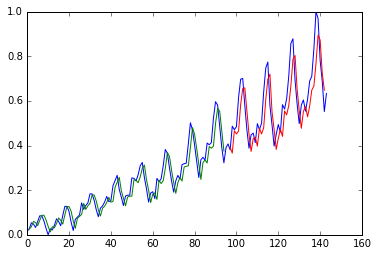

('X', 'targY', 'predY')
(112.0, 118.0, 117.52307659372902)
(118.0, 132.0, 122.73497066403102)
(132.0, 129.0, 135.05335217605381)
(129.0, 121.0, 132.39583437984405)
(121.0, 135.0, 125.35643007836092)
(135.0, 148.0, 137.7202444568602)
(148.0, 148.0, 149.38006167201908)
(148.0, 136.0, 149.38006167201908)
(136.0, 119.0, 138.61125274643103)
(119.0, 104.0, 123.60766030760027)


/home/kikim/anaconda2/envs/theano/lib/python2.7/site-packages/sklearn/preprocessing/data.py:377: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/kikim/anaconda2/envs/theano/lib/python2.7/site-packages/sklearn/preprocessing/data.py:377: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/kikim/anaconda2/envs/theano/lib/python2.7/site-packages/sklearn/preprocessing/data.py:377: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

In [12]:
plotPrediction(look_back, model, trainX, testX, dataset)


trainPredict = model.predict(trainX)
print('X', 'targY', 'predY')
for (x,ty,py) in zip(scaler.inverse_transform(trainX[:10, 0, 0]), 
                     scaler.inverse_transform(trainY[:10]), 
                     scaler.inverse_transform(trainPredict[:10, 0])):
    print(x, ty, py)

## 25.2 LSTM For Regression Using the Window Method

In [13]:
np.random.seed(7)

look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

print('X', 'Y')
for (x,y) in zip(trainX[:10], trainY[:10]):
    print(x, y)

('X', 'Y')
(array([[ 0.01544401,  0.02702703,  0.05405405]], dtype=float32), 0.048262551)
(array([[ 0.02702703,  0.05405405,  0.04826255]], dtype=float32), 0.032818526)
(array([[ 0.05405405,  0.04826255,  0.03281853]], dtype=float32), 0.059845567)
(array([[ 0.04826255,  0.03281853,  0.05984557]], dtype=float32), 0.084942073)
(array([[ 0.03281853,  0.05984557,  0.08494207]], dtype=float32), 0.084942073)
(array([[ 0.05984557,  0.08494207,  0.08494207]], dtype=float32), 0.061776072)
(array([[ 0.08494207,  0.08494207,  0.06177607]], dtype=float32), 0.028957531)
(array([[ 0.08494207,  0.06177607,  0.02895753]], dtype=float32), 0.0)
(array([[ 0.06177607,  0.02895753,  0.        ]], dtype=float32), 0.027027026)
(array([[ 0.02895753,  0.        ,  0.02702703]], dtype=float32), 0.021235526)


In [14]:
# create and fit the LSTM network
model = buildModel(look_back)
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=0)

# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score:', scaler.inverse_transform(np.array([[trainScore]])))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score:', scaler.inverse_transform(np.array([[testScore]])))

('Train Score:', array([[ 105.00297427]]))
('Test Score:', array([[ 108.59656796]]))


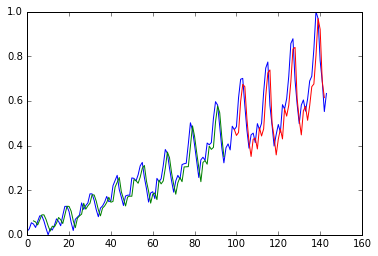

In [15]:
plotPrediction(look_back, model, trainX, testX, dataset)


#trainPredict = model.predict(trainX)
#print('X', 'targY', 'predY')
#for (x,ty,py) in zip(trainX[:10,0], trainY[:10], trainPredict[:10]):
#    print(x, ty,py)

## 25.3 LSTM For Regression with Time Steps

In [16]:
np.random.seed(7)

look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

print('X', 'Y')
for (x,y) in zip(trainX[:10], trainY[:10]):
    print(x, y)

('X', 'Y')
(array([[ 0.01544401],
       [ 0.02702703],
       [ 0.05405405]], dtype=float32), 0.048262551)
(array([[ 0.02702703],
       [ 0.05405405],
       [ 0.04826255]], dtype=float32), 0.032818526)
(array([[ 0.05405405],
       [ 0.04826255],
       [ 0.03281853]], dtype=float32), 0.059845567)
(array([[ 0.04826255],
       [ 0.03281853],
       [ 0.05984557]], dtype=float32), 0.084942073)
(array([[ 0.03281853],
       [ 0.05984557],
       [ 0.08494207]], dtype=float32), 0.084942073)
(array([[ 0.05984557],
       [ 0.08494207],
       [ 0.08494207]], dtype=float32), 0.061776072)
(array([[ 0.08494207],
       [ 0.08494207],
       [ 0.06177607]], dtype=float32), 0.028957531)
(array([[ 0.08494207],
       [ 0.06177607],
       [ 0.02895753]], dtype=float32), 0.0)
(array([[ 0.06177607],
       [ 0.02895753],
       [ 0.        ]], dtype=float32), 0.027027026)
(array([[ 0.02895753],
       [ 0.        ],
       [ 0.02702703]], dtype=float32), 0.021235526)


In [17]:
# create and fit the LSTM network
model = buildModel(1)
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=0)

# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score:', scaler.inverse_transform(np.array([[trainScore]])))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score:', scaler.inverse_transform(np.array([[testScore]])))

('Train Score:', array([[ 105.11716641]]))
('Test Score:', array([[ 110.48699383]]))


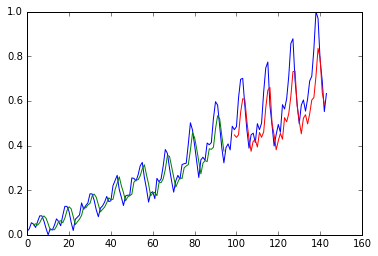

In [18]:
plotPrediction(look_back, model, trainX, testX, dataset)

#trainPredict = model.predict(trainX)
#print('X', 'targY', 'predY')
#for (x,ty,py) in zip(trainX[:10,0], trainY[:10], trainPredict[:10]):
#    print(x, ty,py)

## 25.4 LSTM With Memory Between Batches

In [19]:
def buildStatefulModel(look_back=1, batch_size=1):
    model = Sequential()
    model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), 
                   stateful=True))
    model.add(Dense(1))
    
    return model

In [20]:
np.random.seed(7)

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [22]:
batch_size = 1

model = buildStatefulModel(look_back, batch_size)
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
    model.fit(trainX, trainY, nb_epoch=1, batch_size=batch_size, 
              verbose=0, shuffle=False)
    model.reset_states()

# Estimate model performance
trainScore = model.evaluate(trainX, trainY, batch_size=batch_size, verbose=0)
print('Train Score:', scaler.inverse_transform(np.array([[trainScore]])))
testScore = model.evaluate(testX, testY, batch_size=batch_size, verbose=0)
print('Test Score:', scaler.inverse_transform(np.array([[testScore]])))

('Train Score:', array([[ 105.14492603]]))
('Test Score:', array([[ 109.51121931]]))


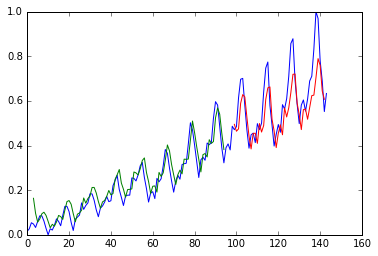

In [23]:
plotPrediction(look_back, model, trainX, testX, dataset, batch_size)

#trainPredict = model.predict(trainX)
#print('X', 'targY', 'predY')
#for (x,ty,py) in zip(trainX[:10,0], trainY[:10], trainPredict[:10]):
#    print(x, ty,py)

## 25.5 Stacked LSTMs With Memory Between Batches

In [312]:
from keras.layers import Dropout

def buildStackedStatefulModel(look_back=1, batch_size=1):
    model = Sequential()
    model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), 
                   stateful=True, return_sequences=True, activation='tanh', dropout_W=0., dropout_U=0.))
    model.add(LSTM(2, stateful=True, activation='tanh'))
    model.add(Dense(1, activation='relu'))
    
    return model

In [313]:
np.random.seed(8)

# reshape into X=t and Y=t+1
look_back = 4
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [314]:
batch_size = 1
epoch = 200

model = buildStackedStatefulModel(look_back, batch_size)
model.compile(loss='mean_squared_error', optimizer='adam')

for i in range(epoch):
    model.fit(trainX, trainY, nb_epoch=1, batch_size=batch_size, 
              verbose=2 if i%(epoch / 10)==0 else 0, shuffle=False)
    
    model.reset_states()
    
    if i%(epoch / 10)==0:
        trainScore = model.evaluate(trainX, trainY, batch_size=batch_size, verbose=0)
        print('Train Score:', scaler.inverse_transform(np.array([[trainScore]])))
        testScore = model.evaluate(testX, testY, batch_size=batch_size, verbose=0)
        print('Test Score:', scaler.inverse_transform(np.array([[testScore]])))
        
    model.reset_states()
    
model.reset_states()
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, batch_size=batch_size, verbose=0)
print('Train Score:', scaler.inverse_transform(np.array([[trainScore]])))
testScore = model.evaluate(testX, testY, batch_size=batch_size, verbose=0)
print('Test Score:', scaler.inverse_transform(np.array([[testScore]])))

Epoch 1/1
0s - loss: 0.0065
('Train Score:', array([[ 112.84994985]]))
('Test Score:', array([[ 145.90340265]]))
Epoch 1/1
0s - loss: 0.0054
('Train Score:', array([[ 106.75726761]]))
('Test Score:', array([[ 123.50178872]]))
Epoch 1/1
0s - loss: 0.0049
('Train Score:', array([[ 106.5874696]]))
('Test Score:', array([[ 123.77554334]]))
Epoch 1/1
0s - loss: 0.0044
('Train Score:', array([[ 106.31025513]]))
('Test Score:', array([[ 121.12268422]]))
Epoch 1/1
0s - loss: 0.0034
('Train Score:', array([[ 105.86607575]]))
('Test Score:', array([[ 116.67561889]]))
Epoch 1/1
0s - loss: 0.0023
('Train Score:', array([[ 105.33078926]]))
('Test Score:', array([[ 112.03774522]]))
Epoch 1/1
0s - loss: 0.0019
('Train Score:', array([[ 105.05987781]]))
('Test Score:', array([[ 109.48614132]]))
Epoch 1/1
0s - loss: 0.0017
('Train Score:', array([[ 104.97217263]]))
('Test Score:', array([[ 109.39386952]]))
Epoch 1/1
0s - loss: 0.0017
('Train Score:', array([[ 104.95003669]]))
('Test Score:', array([[ 1

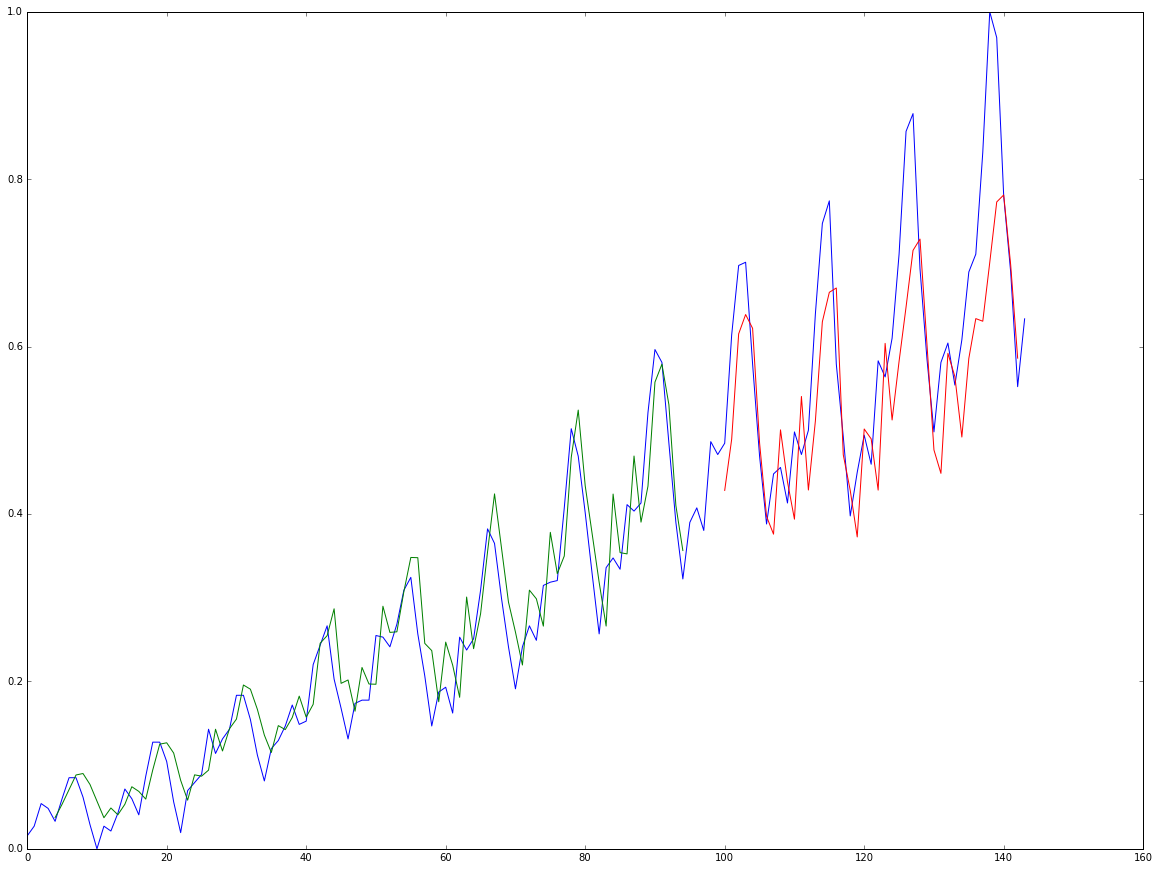

In [315]:
model.reset_states()
plt.rcParams['figure.figsize'] = (20.0, 15.0)
plotPrediction(look_back, model, trainX, testX, dataset, batch_size)

#trainPredict = model.predict(trainX)
#print('X', 'targY', 'predY')
#for (x,ty,py) in zip(trainX[:10,0], trainY[:10], trainPredict[:10]):
#    print(x, ty,py)